In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install pygeodesic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.3/977.3 kB 7.9 MB/s eta 0:00:00


In [5]:
df=pd.read_csv('walmart_cleaned.csv',header=0)
df.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [6]:
df.tail()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
127103,127571,13,2012-07-27,0,94.0,87293.36,80.42,3.537,6699.6,96.56,5.2,8723.87,6650.26,130.719581,5.765,3,219622
127104,127572,13,2012-07-27,0,20.0,8421.96,80.42,3.537,6699.6,96.56,5.2,8723.87,6650.26,130.719581,5.765,3,219622
127105,127573,13,2012-07-27,0,83.0,4352.08,80.42,3.537,6699.6,96.56,5.2,8723.87,6650.26,130.719581,5.765,3,219622
127106,127574,13,2012-07-27,0,10.0,34614.62,80.42,3.537,6699.6,96.56,5.2,8723.87,6650.26,130.719581,5.765,3,219622
127107,127575,13,2012-07-27,0,98.0,13172.48,80.42,3.537,6699.6,96.56,5.2,8723.87,6650.26,130.719581,5.765,3,219622


In [7]:
df.shape

(127108, 17)

In [8]:
df.columns


Index(['Unnamed: 0', 'Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [9]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])  # Convert the 'Date' column to datetime type
df.set_index('Date', inplace=True)

Store: Đây là một định danh số học cho chuỗi cửa hàng.

Date: Ngày ghi nhận dữ liệu.

IsHoliday: Một giá trị nhị phân chỉ ra liệu tuần ghi nhận có là tuần nghỉ lễ (1) hay không (0).

Dept: Đây là một định danh số học cho các phòng ban trong cửa hàng.

Weekly_Sales: Số lượng bán hàng hàng tuần được ghi nhận cho một phòng ban cụ thể trong cửa hàng.

Temperature: Nhiệt độ ghi nhận vào ngày cụ thể.

Fuel_Price: Giá nhiên liệu vào ngày cụ thể.

MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5: Các loại khuyến mãi (chiết khấu) khác nhau.

CPI: Chỉ số giá tiêu dùng (Consumer Price Index).

Unemployment: Tỷ lệ thất nghiệp.

Type: Đây là một định danh số học cho loại cửa hàng.

Size: Kích thước của cửa hàng.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127108 entries, 2010-02-05 to 2012-07-27
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         127108 non-null  int64  
 1   IsHoliday     127108 non-null  int64  
 2   Dept          127108 non-null  float64
 3   Weekly_Sales  127108 non-null  float64
 4   Temperature   127108 non-null  float64
 5   Fuel_Price    127108 non-null  float64
 6   MarkDown1     127108 non-null  float64
 7   MarkDown2     127108 non-null  float64
 8   MarkDown3     127108 non-null  float64
 9   MarkDown4     127108 non-null  float64
 10  MarkDown5     127108 non-null  float64
 11  CPI           127108 non-null  float64
 12  Unemployment  127108 non-null  float64
 13  Type          127108 non-null  int64  
 14  Size          127108 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 15.5 MB


In [11]:
df.isnull().sum()

Store           0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [12]:
df.describe()

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,127108.000000,127108.000000,127108.000000,127108.000000,127108.000000,127108.000000,127108.000000,127108.000000,127108.000000,127108.000000,127108.000000,127108.000000,127108.000000,127108.000000,127108.000000
mean,6.972748,0.070476,43.524428,17958.951538,65.032283,3.281520,2741.369886,1007.750004,565.270207,1151.696712,1768.077831,188.105151,7.536667,2.554049,144482.723613
std,3.754524,0.255948,29.730461,25354.134767,17.585737,0.445869,6093.811125,6158.073788,6442.731830,3829.448023,3988.322368,40.840075,1.937936,0.497072,61699.427471
min,1.000000,0.000000,1.000000,-1098.000000,-2.060000,2.514000,0.000000,-10.980000,0.000000,0.000000,0.000000,126.064000,3.879000,2.000000,34875.000000
25%,4.000000,0.000000,19.000000,2609.722500,52.300000,2.842000,0.000000,0.000000,0.000000,0.000000,0.000000,130.719581,6.404000,2.000000,112238.000000
50%,7.000000,0.000000,36.000000,8425.490000,67.230000,3.332000,0.000000,0.000000,0.000000,0.000000,0.000000,213.167753,7.197000,3.000000,151315.000000
75%,10.000000,0.000000,71.000000,22442.307500,80.210000,3.638000,3242.590000,6.780000,4.690000,585.140000,2544.940000,218.999550,7.962000,3.000000,202505.000000
max,13.000000,1.000000,99.000000,693099.360000,99.220000,4.468000,75149.790000,104519.540000,141630.610000,57817.560000,58068.140000,227.232807,14.313000,3.000000,219622.000000


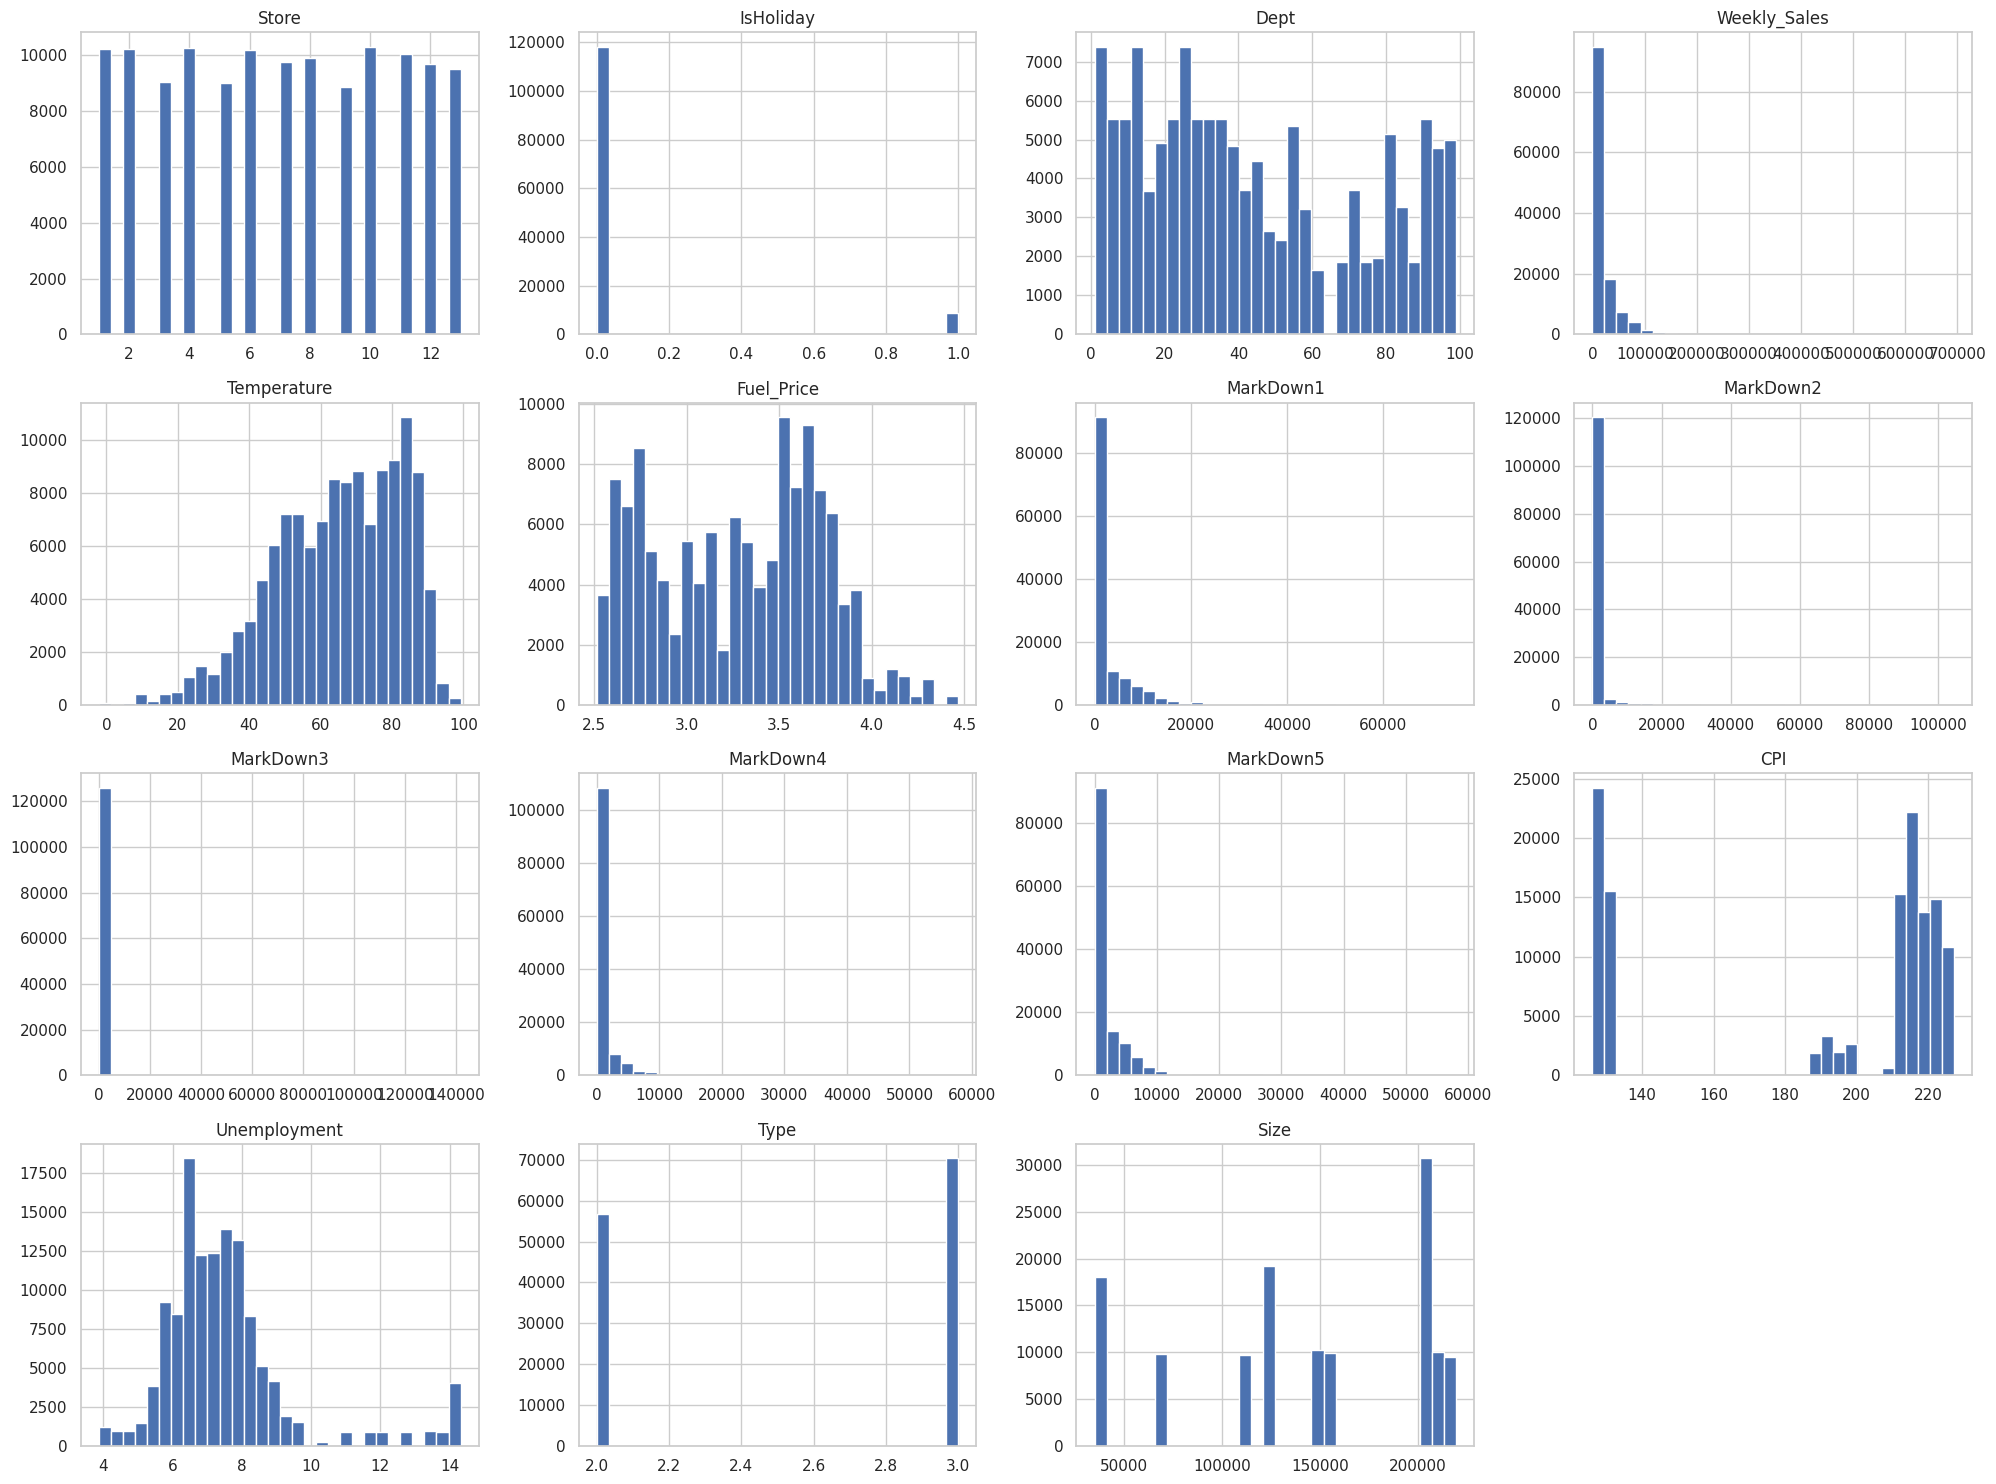

In [13]:
# Set the style of the seaborn plot
sns.set(style="whitegrid")

# Plot histograms of the numerical columns
df.hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.show()

Các cột MarkDown1 đến MarkDown5: Những cột này có sự chênh lệch lớn về giá trị, đa phần là 0, cho thấy các chiết khấu hoặc khuyến mãi không được áp dụng hàng tuần. Điều này cho thấy chỉ có một số tuần cụ thể có sự xuất hiện của các chiết khấu, trong khi trong phần lớn các tuần khác, các giá trị này vẫn giữ ở mức 0.

IsHoliday: Đây là một biến nhị phân chỉ ra liệu một tuần có phải là tuần lễ nghỉ hay không. Dự kiến số tuần nghỉ lễ sẽ ít hơn số tuần không phải nghỉ lễ, vì lễ nghỉ xảy ra tương đối ít.

CPI, Temperature và Unemployment: Các cột này có phân bố gần như chuẩn. Phân phối của Temperature có hơi lệch trái, cho thấy nhiệt độ thấp có thể phổ biến hơn. CPI (Chỉ số giá tiêu dùng) và Unemployment có phân phối tương đối đối xứng.

Fuel_Price: Phân bố của cột Fuel_Price có hơi lệch phải. Điều này cho thấy giá nhiên liệu cao hơn không phổ biến và giá thấp hơn thường xuyên được quan sát.

Weekly_Sales: Phân bố của cột Weekly_Sales có đuôi phải dày đặc. Điều này cho thấy số lượng bán hàng cao hơn không phổ biến, trong khi số lượng bán hàng thấp hơn xảy ra thường xuyên.

Size và Type: Quan sát cho thấy cỡ cửa hàng lớn hơn (phản ánh bởi cột "Size") và cửa hàng thuộc loại 3 (phản ánh bởi cột "Type") phổ biến hơn trong tập dữ liệu. Điều này có thể cho thấy phần lớn cửa hàng trong tập dữ liệu là cỡ lớn và thuộc loại 3.

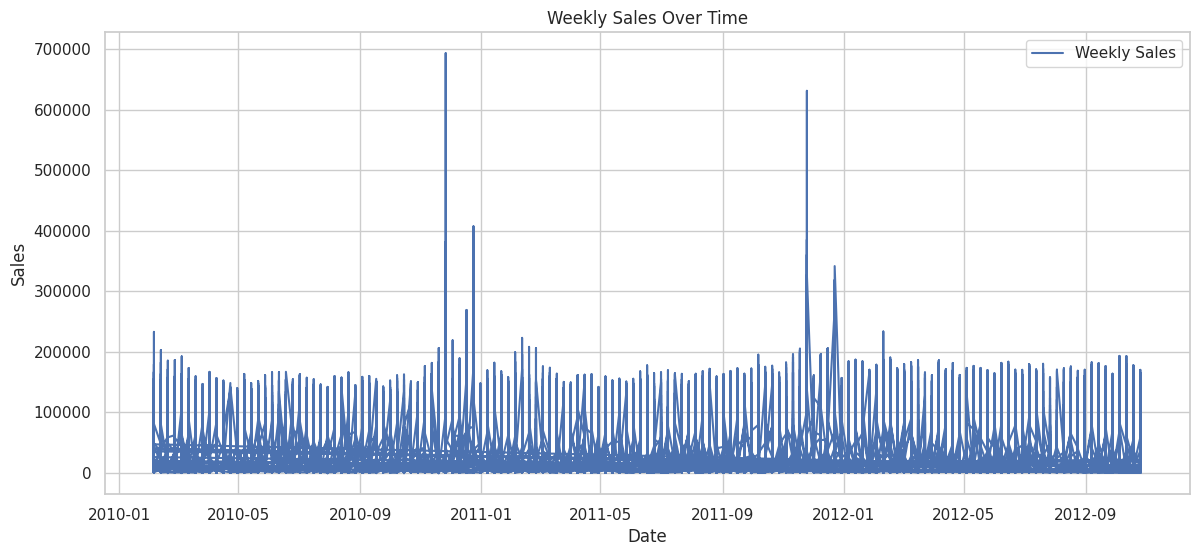

In [14]:
# Plot Weekly_Sales over time
plt.figure(figsize=(14, 6))
plt.plot(df['Weekly_Sales'], label='Weekly Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

Biểu đồ trên cho thấy Weekly_Sales theo thời gian. Có một mẫu rõ ràng của doanh số bán hàng tăng cao vào những thời điểm cụ thể trong năm, có thể tương ứng với mùa mua sắm sôi động như kỳ nghỉ cuối năm.

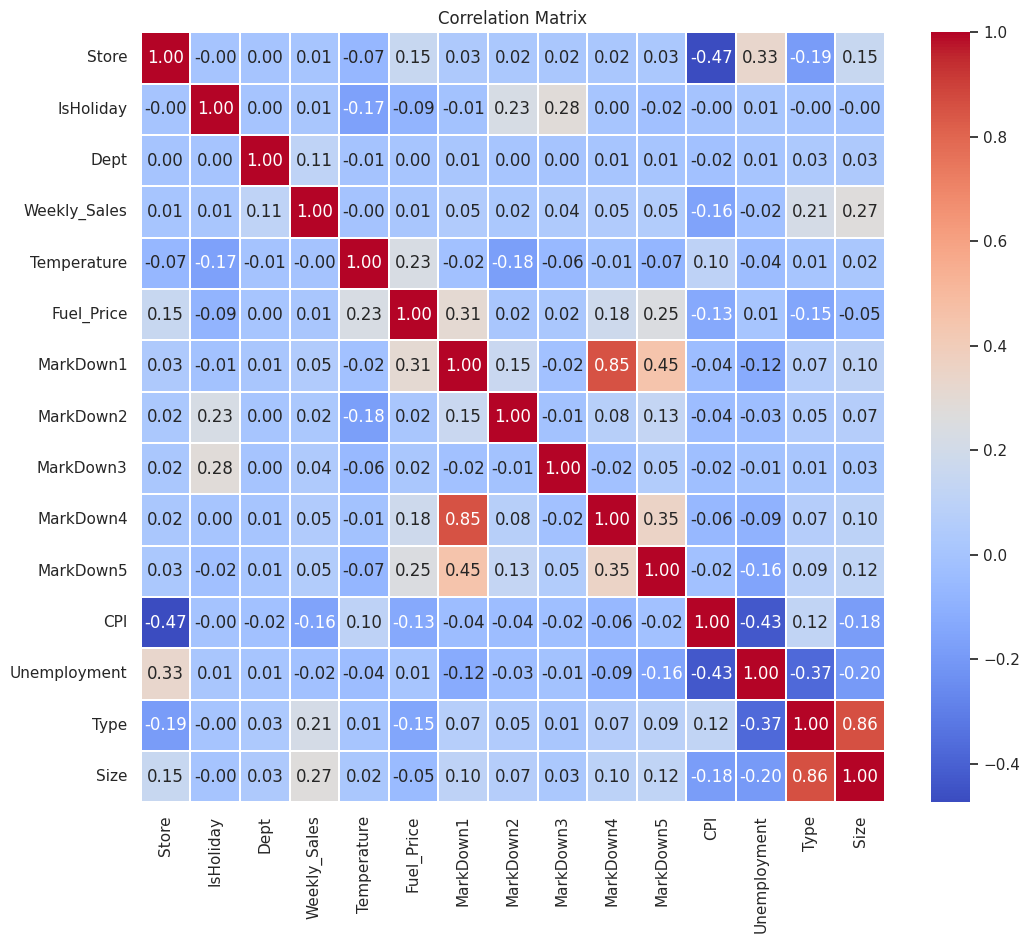

In [15]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

Weekly_Sales và Size: Có một mối tương quan tích cực giữa Weekly_Sales và Size, cho thấy các cửa hàng lớn có tend to có doanh số bán hàng cao hơn. Điều này cho thấy kích thước cửa hàng có thể ảnh hưởng đến hiệu suất bán hàng.

Weekly_Sales và Dept: Weekly_Sales cũng có mối tương quan tích cực với Dept, cho thấy một số bộ phận trong các cửa hàng có tend to có doanh số bán hàng cao hơn so với các bộ phận khác.

Weekly_Sales và Type: Có một mối tương quan âm nhẹ giữa Weekly_Sales và Type, cho thấy một số loại cửa hàng có tend to có doanh số bán hàng thấp hơn. Điều này cho thấy loại cửa hàng có thể ảnh hưởng đến doanh số bán hàng.

Weekly_Sales và các đặc trưng MarkDown: Các đặc trưng MarkDown không có mối tương quan đáng kể với Weekly_Sales. Điều này cho thấy các giảm giá quảng cáo này có thể không ảnh hưởng đáng kể đến doanh số bán hàng tổng thể.

Fuel_Price và MarkDown1, MarkDown4 và MarkDown5: Fuel_Price có mối tương quan tích cực với MarkDown1, MarkDown4 và MarkDown5. Điều này cho thấy các giảm giá quảng cáo cụ thể này có thể liên quan đến giá nhiên liệu một cách nào đó.

CPI và Unemployment: CPI và Unemployment có mối tương quan âm. Điều này là điều dễ hiểu, vì tỷ lệ thất nghiệp cao thường dẫn đến giá trị chỉ số giá tiêu dùng thấp hơn. Mối tương quan này cho thấy một mối quan hệ nghịch đảo giữa giá tiêu dùng và tỷ lệ thất nghiệp.

Type và Size: Type có mối tương quan âm mạnh với Size, cho thấy loại cửa hàng liên quan đến kích thước của nó. Điều này cho thấy các loại cửa hàng khác nhau có tend to có kích thước khác nhau.

Nhiệt độ và các biến khác: Nhiệt độ không có mối tương quan mạnh với các biến khác được đề cập. Điều này cho thấy nhiệt độ có thể không đóng vai trò quan trọng trong việc ảnh hưởng đến doanh số bán hàng hoặc các yếu tố khác được đề cập.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
df['Month'] =df.index.month
df['Size_Type'] =df['Size'] *df['Type']
features = ['Size', 'Dept', 'IsHoliday', 'Type', 'CPI', 'Unemployment', 'Month', 'Size_Type']
target = 'Weekly_Sales'

Việc lấy biến "Size_Type" vào có thể là một cách để tạo ra một biến kết hợp từ hai biến "Size" và "Type". Việc này có thể giúp mô hình học máy của bạn hiểu rõ hơn về mối quan hệ giữa kích thước của cửa hàng và loại cửa hàng đối với doanh số bán hàng.

In [17]:
# Splitting data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Find the best model
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    xgb.XGBRegressor(),
]

param_grid = [
    {},
    {'max_depth': [3, 5, 7]},
    {'n_estimators': [20, 25, 30], 'max_depth': [5, 7, 9]},
]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i])
    grid_search.fit(X_train, y_train)

    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    print()

LinearRegression:
Best parameters: {}
Best R2 score: 0.09929141420891816

DecisionTreeRegressor:
Best parameters: {'max_depth': 7}
Best R2 score: 0.7760633876866789

XGBRegressor:
Best parameters: {'max_depth': 9, 'n_estimators': 30}
Best R2 score: 0.962418383809737



In [28]:
# Simple Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))


Mean Absolute Error (MAE): 16009.35
Mean Squared Error (MSE): 569499131.37
Root Mean Squared Error (RMSE): 23864.18
R-squared (R2) Score: 0.09


In [33]:
dt_model = DecisionTreeRegressor(max_depth=7)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dt)
print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))

Mean Absolute Error (MAE): 6735.31
Mean Squared Error (MSE): 127055888.41
Root Mean Squared Error (RMSE): 11271.91
R-squared (R2) Score: 0.8


In [30]:
# Non-linear model (Random Forest)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)
print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))


Mean Absolute Error (MAE): 1793.8
Mean Squared Error (MSE): 21330351.01
Root Mean Squared Error (RMSE): 4618.48
R-squared (R2) Score: 0.97


In [34]:
import xgboost as xgb

# Create a XGB regressor model
model = xgb.XGBRegressor(n_estimators=30,max_depth=9)

# Fit the model on the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=30, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))

Mean Absolute Error (MAE): 2197.62
Mean Squared Error (MSE): 18045677.85
Root Mean Squared Error (RMSE): 4248.02
R-squared (R2) Score: 0.97


Đánh giá hiệu suất mô hình:

*Linear RegressionMean

  -Absolute Error (MAE): 16009.35

  -Mean Squared Error (MSE): 569499131.37

  -Root Mean Squared Error (RMSE): 23864.18

  -R-squared (R2) Score: 0.09


Random Forest RMSE: 4,444.68, R2 Score: 0.962

Extreme Gradient Boosting RMSE: 5699.48, R2 Score: 0.94

Rõ ràng, mô hình Random Forest là mô hình có hiệu suất tốt nhất. RMSE nhỏ nhất và R2 Score (hệ số xác định) cao nhất cho mô hình Random Forest.

RMSE là một đánh giá về sự khác biệt giữa các giá trị được dự đoán bởi mô hình và các giá trị thực tế. Trong trường hợp này, RMSE nhỏ hơn cho thấy mô hình phù hợp tốt hơn với dữ liệu.

R2 Score là một đánh giá về mức độ các dự đoán hồi quy xấp xỉ điểm dữ liệu thực tế. R2 Score bằng 1 cho thấy các dự đoán hồi quy phù hợp hoàn hảo với dữ liệu. Do đó, R2 Score là 0.954 cho mô hình Random Forest cho thấy một mức độ phù hợp rất tốt.

Vì vậy, dựa trên các độ đo này, mô hình Random Forest là mô hình tốt nhất cho dữ liệu này.